In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive/code/cse495-graduation-project/

/content/gdrive/MyDrive/code/cse495-graduation-project


In [4]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [5]:
from utils import *

In [6]:
def create_model():
    num_classes = 4
    sample_shape = (63, 63, 119, 1)

    # model = models.Sequential()
    # model.add(layers.Conv3D(32, kernel_size=(5, 5, 5), activation='relu', kernel_initializer='he_uniform', input_shape=sample_shape))
    # model.add(layers.MaxPooling3D(pool_size=(4, 4, 4)))
    # model.add(layers.BatchNormalization(center=True, scale=True))
    # model.add(layers.Dropout(0.5))
    # model.add(layers.Conv3D(64, kernel_size=(5, 5, 5), activation='relu', kernel_initializer='he_uniform'))
    # model.add(layers.MaxPooling3D(pool_size=(4, 4, 4)))
    # model.add(layers.BatchNormalization(center=True, scale=True))
    # model.add(layers.Dropout(0.5))
    # model.add(layers.Flatten())
    # model.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
    # model.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
    # model.add(layers.Dense(num_classes))
    # num_classes = 4

    model = models.Sequential()
    model.add(layers.Conv3D(32, (3, 3, 3), activation='relu',
                            input_shape=(63, 63, 119, 1)))
    model.add(layers.MaxPooling3D((2, 2, 2)))
    model.add(layers.Conv3D(64, (3, 3, 3), activation='relu'))
    model.add(layers.MaxPooling3D((2, 2, 2)))
    model.add(layers.Conv3D(64, (3, 3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes))
    

    
    model.summary()
    return model

In [25]:
def train_model(model, X_train, Y_train, X_val, Y_val):
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  optimizer=optimizers.Adam(lr=0.001, decay=1e-06),
                  metrics=['accuracy'])
    
    # adam = optimizers.Adam(lr=0.001, decay=1e-06)
    # model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

                  

    history = model.fit(X_train, Y_train, batch_size=32, epochs=100, verbose=1, validation_data=(X_val, Y_val))
    
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')

In [ ]:
X, Y, _, _ = get_hsi()
X.shape, Y.shape

((216, 63, 63, 119), (216,))

In [ ]:
X = X.reshape(X.shape + (1,))
X.shape

(216, 63, 63, 119, 1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=42)
X_train.shape, Y_train.shape

((172, 63, 63, 119, 1), (172,))

In [ ]:
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5)
X_test.shape, Y_test.shape

((22, 63, 63, 119, 1), (22,))

In [ ]:
X_val.shape, Y_val.shape

((22, 63, 63, 119, 1), (22,))

In [ ]:
model = create_model()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_4 (Conv3D)            (None, 61, 61, 117, 32)   896       
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 30, 30, 58, 32)    0         
_________________________________________________________________
conv3d_5 (Conv3D)            (None, 28, 28, 56, 64)    55360     
_________________________________________________________________
max_pooling3d_5 (MaxPooling3 (None, 14, 14, 28, 64)    0         
_________________________________________________________________
conv3d_6 (Conv3D)            (None, 12, 12, 26, 64)    110656    
_________________________________________________________________
flatten_2 (Flatten)          (None, 239616)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

Epoch 1/100
6/6 [==============================] - 6s 686ms/step - loss: 2.3885 - accuracy: 0.4979 - val_loss: 1.2135 - val_accuracy: 0.7273
Epoch 2/100
6/6 [==============================] - 3s 481ms/step - loss: 1.1801 - accuracy: 0.5674 - val_loss: 0.9907 - val_accuracy: 0.7273
Epoch 3/100
6/6 [==============================] - 3s 480ms/step - loss: 1.1228 - accuracy: 0.5656 - val_loss: 0.9396 - val_accuracy: 0.7273
Epoch 4/100
6/6 [==============================] - 3s 481ms/step - loss: 1.1067 - accuracy: 0.5517 - val_loss: 0.8450 - val_accuracy: 0.7273
Epoch 5/100
6/6 [==============================] - 3s 479ms/step - loss: 1.1047 - accuracy: 0.5503 - val_loss: 0.8592 - val_accuracy: 0.7273
Epoch 6/100
6/6 [==============================] - 3s 484ms/step - loss: 1.0287 - accuracy: 0.5479 - val_loss: 1.1621 - val_accuracy: 0.7273
Epoch 7/100
6/6 [==============================] - 3s 487ms/step - loss: 1.1408 - accuracy: 0.5816 - val_loss: 0.9017 - val_accuracy: 0.7273
Epoch 8/100
6

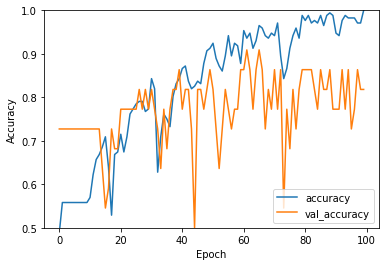

In [ ]:
train_model(model, X_train, Y_train, X_val, Y_val)

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

1/1 - 0s - loss: 1.3707 - accuracy: 0.7273


In [ ]:
model.save('cnn3d_model')

INFO:tensorflow:Assets written to: cnn3d_model/assets


In [32]:
def multiple_test(n=5):
  norms = {'l0': [0,0,0,0], 'l1': [0,0,0,0], 'l2': [0,0,0,0], 'linf': [0,0,0,0]}
  loss, acc = 0, 0

  for i in range(n):
    X, Y, _, _ = get_hsi()
    X = X.reshape(X.shape + (1,))

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=i)
    X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5)
    model = create_model()
    train_model(model, X_train, Y_train, X_val, Y_val)
    test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)
    loss += test_loss
    acc += test_acc
    model.save('test2_model')
    for k, v in norms.items():
      ac, pr, rc, hl = cbir('test2_model', norm=k, verbose=False)
      norms[k][0] += ac
      norms[k][1] += pr
      norms[k][2] += rc
      norms[k][3] += hl
    


  # get average
  loss /= n
  acc /= n
  print('loss: ', loss)
  print('acc: ', acc)
  for k, v in norms.items():
    for i in range(4):
      norms[k][i] /= n
    print('AC (%): {:.4f}\nPR (%): {:.4f}\nRC (%): {:.4f}\nHL    : {:.4f}'.format(norms[k][0], norms[k][1], norms[k][2], norms[k][3]))

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_84 (Conv3D)           (None, 61, 61, 117, 32)   896       
_________________________________________________________________
max_pooling3d_56 (MaxPooling (None, 30, 30, 58, 32)    0         
_________________________________________________________________
conv3d_85 (Conv3D)           (None, 28, 28, 56, 64)    55360     
_________________________________________________________________
max_pooling3d_57 (MaxPooling (None, 14, 14, 28, 64)    0         
_________________________________________________________________
conv3d_86 (Conv3D)           (None, 12, 12, 26, 64)    110656    
_________________________________________________________________
flatten_28 (Flatten)         (None, 239616)            0         
_________________________________________________________________
dense_84 (Dense)             (None, 128)             

INFO:tensorflow:Assets written to: test2_model/assets


Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_87 (Conv3D)           (None, 61, 61, 117, 32)   896       
_________________________________________________________________
max_pooling3d_58 (MaxPooling (None, 30, 30, 58, 32)    0         
_________________________________________________________________
conv3d_88 (Conv3D)           (None, 28, 28, 56, 64)    55360     
_________________________________________________________________
max_pooling3d_59 (MaxPooling (None, 14, 14, 28, 64)    0         
_________________________________________________________________
conv3d_89 (Conv3D)           (None, 12, 12, 26, 64)    110656    
_________________________________________________________________
flatten_29 (Flatten)         (None, 239616)            0         
_________________________________________________________________
dense_87 (Dense)             (None, 128)             

INFO:tensorflow:Assets written to: test2_model/assets


Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_90 (Conv3D)           (None, 61, 61, 117, 32)   896       
_________________________________________________________________
max_pooling3d_60 (MaxPooling (None, 30, 30, 58, 32)    0         
_________________________________________________________________
conv3d_91 (Conv3D)           (None, 28, 28, 56, 64)    55360     
_________________________________________________________________
max_pooling3d_61 (MaxPooling (None, 14, 14, 28, 64)    0         
_________________________________________________________________
conv3d_92 (Conv3D)           (None, 12, 12, 26, 64)    110656    
_________________________________________________________________
flatten_30 (Flatten)         (None, 239616)            0         
_________________________________________________________________
dense_90 (Dense)             (None, 128)             

INFO:tensorflow:Assets written to: test2_model/assets


Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_93 (Conv3D)           (None, 61, 61, 117, 32)   896       
_________________________________________________________________
max_pooling3d_62 (MaxPooling (None, 30, 30, 58, 32)    0         
_________________________________________________________________
conv3d_94 (Conv3D)           (None, 28, 28, 56, 64)    55360     
_________________________________________________________________
max_pooling3d_63 (MaxPooling (None, 14, 14, 28, 64)    0         
_________________________________________________________________
conv3d_95 (Conv3D)           (None, 12, 12, 26, 64)    110656    
_________________________________________________________________
flatten_31 (Flatten)         (None, 239616)            0         
_________________________________________________________________
dense_93 (Dense)             (None, 128)             

INFO:tensorflow:Assets written to: test2_model/assets


Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_96 (Conv3D)           (None, 61, 61, 117, 32)   896       
_________________________________________________________________
max_pooling3d_64 (MaxPooling (None, 30, 30, 58, 32)    0         
_________________________________________________________________
conv3d_97 (Conv3D)           (None, 28, 28, 56, 64)    55360     
_________________________________________________________________
max_pooling3d_65 (MaxPooling (None, 14, 14, 28, 64)    0         
_________________________________________________________________
conv3d_98 (Conv3D)           (None, 12, 12, 26, 64)    110656    
_________________________________________________________________
flatten_32 (Flatten)         (None, 239616)            0         
_________________________________________________________________
dense_96 (Dense)             (None, 128)             

INFO:tensorflow:Assets written to: test2_model/assets


loss:  1.6497585892677307
acc:  0.7545454621315002
AC (%): 0.5645
PR (%): 0.7176
RC (%): 0.7405
HL    : 5.1767
AC (%): 0.6206
PR (%): 0.7710
RC (%): 0.7689
HL    : 4.4280
AC (%): 0.6212
PR (%): 0.7711
RC (%): 0.7692
HL    : 4.4157
AC (%): 0.6195
PR (%): 0.7706
RC (%): 0.7672
HL    : 4.4331


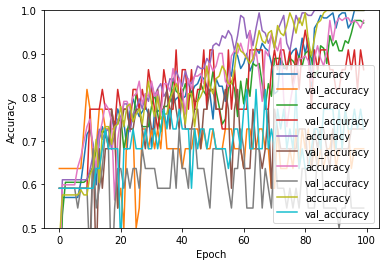

In [34]:
multiple_test()